In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

#imports
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import glob
# import tensorflow as tf
# tf.test.gpu_device_name()
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'
import io

# #arquivo do ITSM

In [18]:
df = pd.read_excel('identificadoresGabarito.xlsx',sheet_name = "identificadores")


In [3]:
#head 
df.head()

,Unnamed: 0,GRUPO_DONO_SERVICO,SOLICITANTE,ANALISTA,SERVICO,GRUPO_SOLUCIONADOR,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
0,0,CSMOP SISTEMICO N2,Conceicao Aparecida Campanha Tassi,GPI - Danilo Gomes Moreno,CONCEDER BENEFICIOS,CSMOP SISTEMICO N2,726,805,1020,703,726
1,1,CYBERSECURITY N2,Leandro Silva Da Cruz,Atos - Felipe Gonçalves da Silva,NaN,SERVICE DESK CYBERSERCURITY N1,728,1233,591,1837,1544
2,2,COAIS INFRAESTRUTURA,Maria Cristina Messias dos Santos,Atos - Felipe Gonçalves da Silva,OUTLOOK,SERVICE DESK ATOS (FSN1),692,1332,591,1403,1540
3,3,CSMOP SISTEMICO N2,Vitor Cesar Lopes De Souza,Spread - José Luiz Cabral de Avelar,SERVICO DE PORTABILIDADE,COSIP/COIMP SISTEMICO N2,726,1793,1673,1595,718
4,4,CYBERSECURITY N2,Rodolfo Leme Pezetta,Atos - Danilo Ribeiro Domingues,NaN,SERVICE DESK ATOS (FSN2),728,1511,583,1837,1541


In [4]:
df.describe()

,Unnamed: 0,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR
count,67417.000000,67417.000000,67417.000000,67417.000000,67417.000000,67417.000000
mean,33708.000000,835.526662,974.348102,876.740748,1318.866992,1180.903986
std,19461.755886,342.238970,519.439033,446.528412,485.960109,410.803356
min,0.000000,671.000000,6.000000,132.000000,0.000000,19.000000
25%,16854.000000,695.000000,608.000000,603.000000,892.000000,724.000000
50%,33708.000000,724.000000,988.000000,630.000000,1452.000000,1540.000000
75%,50562.000000,728.000000,1346.000000,1068.000000,1837.000000,1543.000000
max,67416.000000,1837.000000,1838.000000,1837.000000,1837.000000,1837.000000


# conjunto de todos os analistas e serviços para cada solicitante

In [5]:
df1 = pd.crosstab(index = [df['ID_SOLICITANTE'], df['ID_SERVICO']], columns = df['ID_ANALISTA'])
df1


ID_ANALISTA                132   133   134   139   141   151   153   156   \
ID_SOLICITANTE ID_SERVICO                                                   
6              686            0     0     0     0     0     0     0     0   
               892            0     0     0     0     0     0     0     0   
               1401           0     0     0     0     0     0     0     0   
               1837           0     0     0     0     0     0     0     0   
8              136            0     0     0     0     0     0     0     0   
...                         ...   ...   ...   ...   ...   ...   ...   ...   
1835           1837           0     0     0     0     0     0     0     0   
1836           1837           0     0     0     0     0     0     0     0   
1837           1837           0     0     0     0     0     0     0     0   
1838           892            0     0     0     0     0     0     0     0   
               1837           0     0     0     0     0     0     0     0   

ID_ANALISTA                157   158   ...  1788  1798  1800  1807  1813  \
ID_SOLICITANTE ID_SERVICO              ...                                 
6              686            0     0  ...     0     0     0     0     0   
               892            0     0  ...     0     0     0     0     0   
               1401           0     0  ...     0     0     0     0     0   
               1837           0     0  ...     0     0     0     0     0   
8              136            0     0  ...     0     0     0     0     0   
...                         ...   ...  ...   ...   ...   ...   ...   ...   
1835           1837           0     0  ...     0     0     0     0     0   
1836           1837           0     0  ...     0     0     0     0     0   
1837           1837           0     0  ...     0     0     0     0     0   
1838           892            0     0  ...     0     0     0     0     0   
               1837           0     0  ...     0     0     0     0     0   

ID_ANALISTA                1821  1823  1827  1834  1837  
ID_SOLICITANTE ID_SERVICO                                
6              686            0     0     0     0     0  
               892            0     0     0     0     0  
               1401           0     0     0     0     0  
               1837           0     0     0     0     0  
8              136            0     0     0     0     3  
...                         ...   ...   ...   ...   ...  
1835           1837           0     0     0     0     0  
1836           1837           0     0     0     0     1  
1837           1837           0     0     0     0     3  
1838           892            0     0     0     0     0  
               1837           0     0     0     0     0  

[9743 rows x 226 columns]

In [6]:
#reset index
df1.reset_index()

ID_ANALISTA,ID_SOLICITANTE,ID_SERVICO,132,133,134,139,141,151,153,156,...,1788,1798,1800,1807,1813,1821,1823,1827,1834,1837
0,6,686,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,6,892,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,1401,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,6,1837,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,8,136,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9738,1835,1837,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9739,1836,1837,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
9740,1837,1837,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
9741,1838,892,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#  Definindo função para validar probabilidade de aparecer do atendimento
# ser direcionado ao analista


In [7]:
def probStatus(dataset, group_by):
    df1 = pd.crosstab(index = dataset[group_by], columns = dataset['ID_ANALISTA']).reset_index()
    df1['Yes'] = df1.iloc[:,2:].sum(axis =1)
    df1['No'] = (df1 == 0).sum(axis = 1)
    df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
    return df1[[group_by, 'probShowUp']]


#  Probabilidade de relação entre serviço e Analista

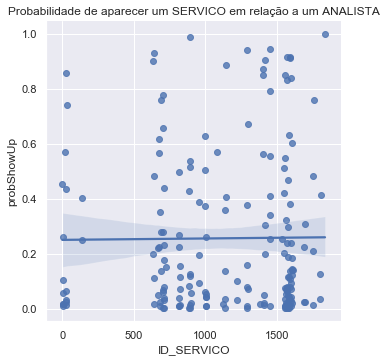

In [8]:
sns.lmplot(data = probStatus(df, 'ID_SERVICO'), x = 'ID_SERVICO', y = 'probShowUp', fit_reg = True)
plt.xlim()
plt.title('Probabilidade de aparecer um SERVICO em relação a um ANALISTA')
plt.show()


In [9]:
df1['Yes'] = df1.iloc[:,2:].sum(axis =1).astype(int)
df1['No'] = (df1 == 0).sum(axis = 1)
df1['probShowUp'] = (df1['Yes'] / (df1['Yes'] + df1['No'])).astype(float)
df1 = df1.sort_values(by = 'probShowUp' , axis=0, ascending=False)


In [10]:
df1.nunique()

ID_ANALISTA
132             2
133             3
134             4
139            30
141            13
             ... 
1834            3
1837           29
Yes           159
No             35
probShowUp    588
Length: 229, dtype: int64

# extração da informação do df1 para excel

In [11]:
df1.iloc[:,-120:]
data_file_excel = pd.ExcelWriter('Resultados.xlsx', engine = 'xlsxwriter')
df1.to_excel(data_file_excel, sheet_name= 'solicitante_servico')
data_file_excel.save()

# Agrupamento de qtde de solicitantes para um mesmo serviço para um analista


In [21]:
sub_df = df.groupby(['ID_ANALISTA', 'ID_SERVICO']).ID_SOLICITANTE.count().reset_index()
sub_df.columns = ['ID_ANALISTA','ID_SERVICO','QTD_SOLICITANTE']
sub_df = sub_df.sort_values(by = 'QTD_SOLICITANTE' , axis=0, ascending=False)
sub_df

,ID_ANALISTA,ID_SERVICO,QTD_SOLICITANTE
1440,632,1837,2085
1398,632,892,1884
810,605,1837,1693
1038,615,1837,1641
221,575,892,1208
...,...,...,...
1962,1020,28,1
1960,1020,23,1
1959,1020,4,1
1957,1013,822,1


# extração da informação do df1 para excel

In [50]:

data_file_excel = pd.ExcelWriter('Resultados.xlsx', engine = 'xlsxwriter')
sub_df.to_excel(data_file_excel, sheet_name= 'solicitante_servico_qtde')
data_file_excel.save()

In [22]:
#Quantidades
sub_df.nunique()

ID_ANALISTA        226
ID_SERVICO         190
QTD_SOLICITANTE    199
dtype: int64

# Gráfico em barras da quantidade de SOLICITANTES diferentes atendidos por ANALISTA
#muitos dados para execução

In [23]:
# ax = df1.plot.bar(figsize= (30,10), legend = False, stacked = True)
# plt.title("Quantidade de SOLICITANTES por ANALISTA", size = 14)
# ax.set_ylabel('Quantidade de Solicitantes', size = 14)
# # Add the annotations
# for p in ax.patches:
#     width = p.get_width()
#     height = p.get_height()
#     x, y = p.get_xy() 
#     ax.annotate('{:}'.format(height), (x + width/2, y + height*1.02), ha='center', fontsize= 9)


# plt.show()

# Cluster de analista x serviço

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SERVIÇO')

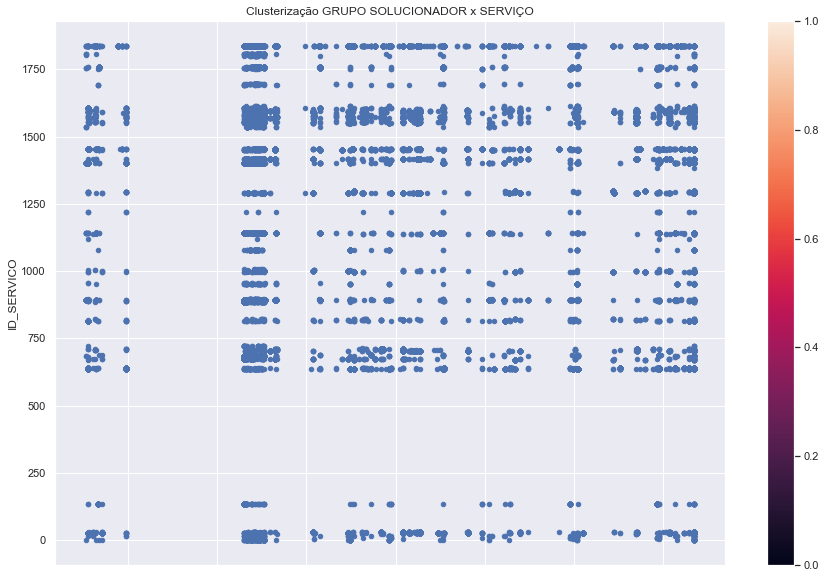

In [26]:

clusters = 2
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_SOLICITANTE', 'ID_GRUPO_SOLUCIONADOR', 'ID_ANALISTA', 'ID_SERVICO']].iloc[:len(df)]
df_kmeans = df[['ID_SERVICO','ID_ANALISTA','ID_GRUPO_SOLUCIONADOR', 'ID_SOLICITANTE']].iloc[:len(df)]


kmeans.fit(df_kmeans)

df.plot.scatter(x='ID_ANALISTA', y='ID_SERVICO', colormap='viridis', figsize=(15, 10))
plt.title('Clusterização ANALISTA x SERVIÇO')

# Resultado com uma quantidade maior de clusters

Text(0.5, 1.0, 'Clusterização GRUPO SOLUCIONADOR x SOLICITANTE')

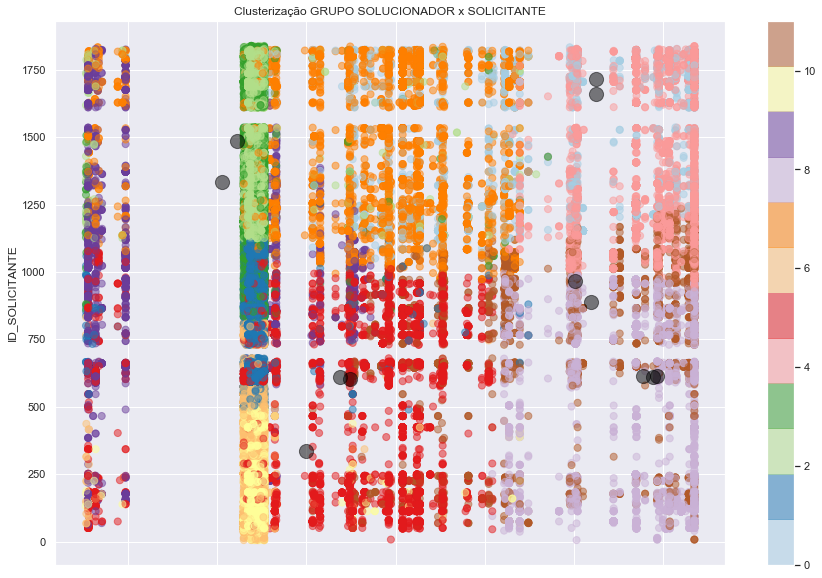

In [29]:

clusters = 12
kmeans = KMeans(n_clusters=clusters)

df_kmeans = df[['ID_SOLICITANTE', 'ID_GRUPO_SOLUCIONADOR', 'ID_ANALISTA', 'ID_SERVICO']].iloc[:len(df)]
df_kmeans = df[['ID_SERVICO','ID_ANALISTA','ID_GRUPO_SOLUCIONADOR', 'ID_SOLICITANTE']].iloc[:len(df)]


model = kmeans.fit(df_kmeans)
y_pred = kmeans.predict(df_kmeans) #predicting labels (y) and saving to y_pred 
centers = kmeans.cluster_centers_ #cluster centers as determined by the k-means estimator

#ploting cluster
df.plot.scatter(x='ID_ANALISTA', y='ID_SOLICITANTE',c=y_pred, cmap=plt.cm.Paired, figsize=(15, 10), s=50, alpha=0.5)
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);
plt.title('Clusterização GRUPO SOLUCIONADOR x SOLICITANTE')



# Dataset com o agrupamento de cluster ao qual cada um pertence

In [52]:
#Show the cluster
df['cluster'] = y_pred
df.iloc[:60]


,Unnamed: 0,GRUPO_DONO_SERVICO,SOLICITANTE,ANALISTA,SERVICO,GRUPO_SOLUCIONADOR,ID_GRUPO_DONO_SERVICO,ID_SOLICITANTE,ID_ANALISTA,ID_SERVICO,ID_GRUPO_SOLUCIONADOR,cluster
0,0,CSMOP SISTEMICO N2,Conceicao Aparecida Campanha Tassi,GPI - Danilo Gomes Moreno,CONCEDER BENEFICIOS,CSMOP SISTEMICO N2,726,805,1020,703,726,11
1,1,CYBERSECURITY N2,Leandro Silva Da Cruz,Atos - Felipe Gonçalves da Silva,NaN,SERVICE DESK CYBERSERCURITY N1,728,1233,591,1837,1544,2
2,2,COAIS INFRAESTRUTURA,Maria Cristina Messias dos Santos,Atos - Felipe Gonçalves da Silva,OUTLOOK,SERVICE DESK ATOS (FSN1),692,1332,591,1403,1540,2
3,3,CSMOP SISTEMICO N2,Vitor Cesar Lopes De Souza,Spread - José Luiz Cabral de Avelar,SERVICO DE PORTABILIDADE,COSIP/COIMP SISTEMICO N2,726,1793,1673,1595,718,4
4,4,CYBERSECURITY N2,Rodolfo Leme Pezetta,Atos - Danilo Ribeiro Domingues,NaN,SERVICE DESK ATOS (FSN2),728,1511,583,1837,1541,2
5,5,CSMOP SISTEMICO N2,Jose Adeilson Soares,Henrique Soares Ventura,SERVICO DE RESGATE,COAIS INFRAESTRUTURA,726,1180,1132,1598,692,7
6,6,COENC ATIVOS,Juarez Domingos Frasson Vidotto,Atos - Yonara Eloy da Costa,ESTACAO TRABALHO,SERVICE DESK ATOS (FSN1),695,1193,632,892,1540,3
7,7,COFAL SISTEMICO N2,Rosilene De Almeida Moreira,Fabio Rodrigo Saijo,CALCULAR E CONCILIAR PROVISOES BR E USGAAP,CSMOP SISTEMICO N2,698,1533,960,673,726,0
8,8,GETEC SISTEMICO N2,Viviane Veronica Cascardo Nardini,Diogo Vilela de Souza,RELACIONAR COM CLIENTES,CIGEC SISTEMICO N2,1007,1799,880,1452,687,7
9,9,CSMOP SISTEMICO N2,Janine Defensor De Moura,Atos - Renata Toncovitch das Neves,SERVICO DE PORTABILIDADE,SERVICE DESK ATOS SISTEMICO N1,726,1160,624,1595,1543,2


In [53]:
df = df

# extração da informação do df1 para excel

In [54]:

data_file_excel = pd.ExcelWriter('Resultados.xlsx', engine = 'xlsxwriter')
sub_df.to_excel(data_file_excel, sheet_name= 'solicitante_servico_cluster')
data_file_excel.save()

In [55]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=8, affinity='euclidean', linkage='ward')
df_cluster = df[['ID_SERVICO', 'ID_GRUPO_SOLUCIONADOR']].values
df_cluster
# cluster.fit_predict(df_cluster)

# plt.figure(figsize=(10, 7))
# plt.scatter(df_cluster.ID_GRUPO_SOLUCIONADOR, df_cluster.ID_SERVICO, c=cluster.labels_, cmap='rainbow')


array([[ 703,  726],
       [1837, 1544],
       [1403, 1540],
       ...,
       [1837, 1837],
       [ 638,  697],
       [ 711,  726]], dtype=int64)